In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
!pip install chart_studio
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

     -------------------------------------- 64.4/64.4 kB 576.3 kB/s eta 0:00:00


In [2]:
data = pd.read_csv('time_series_ass3.txt')
data

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN
...,...,...,...,...,...,...
8635,8635,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9
8636,8636,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9
8637,8637,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6
8638,8638,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8


# Gathering and checking data:

In [3]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 8640
Number of columns: 6


In [6]:
print("Column names:", data.columns)

Column names: Index(['Unnamed: 0', 'From', 'To (Interval: 15M)', 'PM10 (µg/m3)',
       'PM2.5 (µg/m3)', 'NO (µg/m3)'],
      dtype='object')


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB
None


In [8]:
print(data.describe())

        Unnamed: 0  PM10 (µg/m3)  PM2.5 (µg/m3)   NO (µg/m3)
count  8640.000000   6959.000000    8414.000000  7271.000000
mean   4319.500000    181.408679      75.690397    14.649636
std    2494.297496    136.016142      55.245265    19.221385
min       0.000000     12.000000       3.000000     0.100000
25%    2159.750000     84.000000      36.000000     3.900000
50%    4319.500000    145.000000      61.000000     6.100000
75%    6479.250000    238.000000     101.000000    16.500000
max    8639.000000    847.000000     474.000000   157.500000


In [9]:
data.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


# Processing the data

In [10]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Unnamed: 0               0
From                     0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
dtype: int64


In [13]:
data_cleaned = data.dropna()

In [14]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Unnamed: 0               0
From                     0
To (Interval: 15M)       0
PM10 (µg/m3)          1681
PM2.5 (µg/m3)          226
NO (µg/m3)            1369
dtype: int64


In [16]:
data['PM2.5 (µg/m3)'].fillna(data['PM2.5 (µg/m3)'].mean().round(2),inplace = True )
data['PM10 (µg/m3)'].fillna(data['PM10 (µg/m3)'].mean().round(2),inplace = True )
data['NO (µg/m3)'].fillna(data['NO (µg/m3)'].mean().round(2),inplace = True )

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        8640 non-null   float64
 4   PM2.5 (µg/m3)       8640 non-null   float64
 5   NO (µg/m3)          8640 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [18]:
print("Number of duplicate rows:", data_cleaned.duplicated().sum())

Number of duplicate rows: 0


In [19]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Unnamed: 0            0
From                  0
To (Interval: 15M)    0
PM10 (µg/m3)          0
PM2.5 (µg/m3)         0
NO (µg/m3)            0
dtype: int64


# Analyzing the Pollutant level

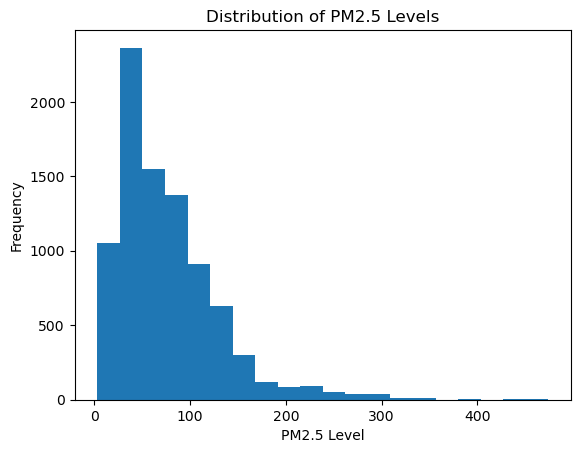

In [20]:
plt.hist(data['PM2.5 (µg/m3)'], bins=20)
plt.xlabel('PM2.5 Level')
plt.ylabel('Frequency')
plt.title('Distribution of PM2.5 Levels')
plt.show()

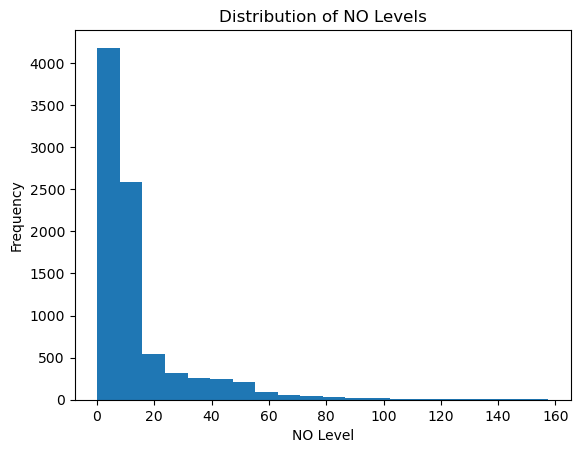

In [25]:
plt.hist(data['NO (µg/m3)'], bins=20)
plt.xlabel('NO Level')
plt.ylabel('Frequency')
plt.title('Distribution of NO Levels')
plt.show()

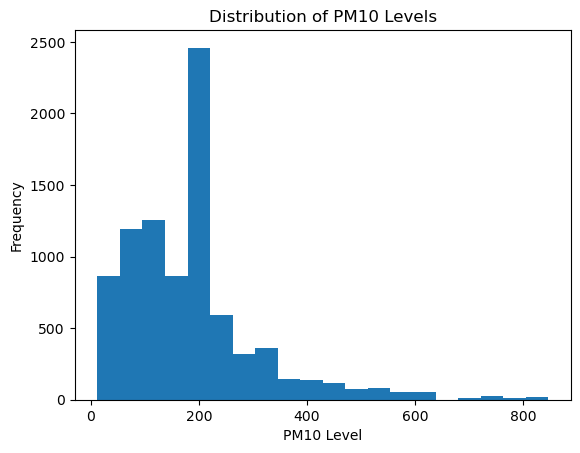

In [24]:
plt.hist(data['PM10 (µg/m3)'], bins=20)
plt.xlabel('PM10 Level')
plt.ylabel('Frequency')
plt.title('Distribution of PM10 Levels')
plt.show()

<Axes: >

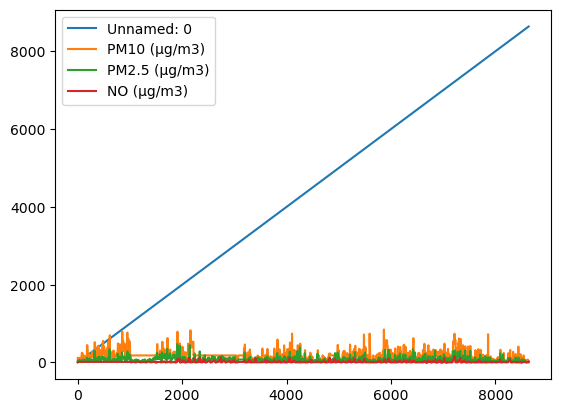

In [26]:
data.plot()

<Axes: >

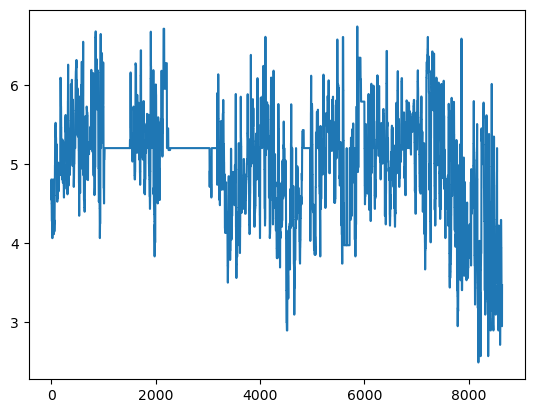

In [30]:
data['PM10 (µg/m3)'].plot()

<Axes: >

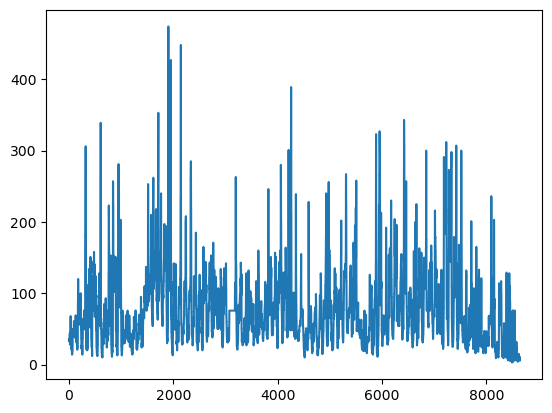

In [31]:
data['PM2.5 (µg/m3)'].plot()

<Axes: >

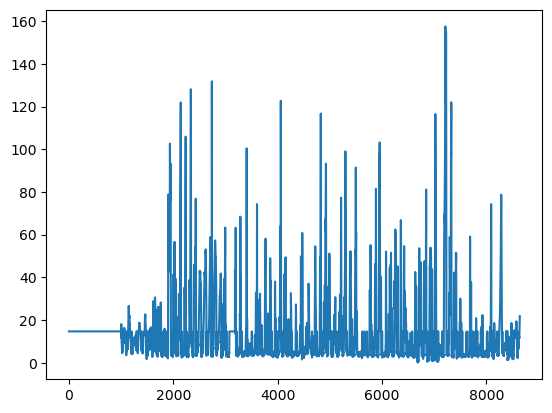

In [32]:
data['NO (µg/m3)'].plot()

In [34]:
import statsmodels.graphics.tsaplots

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


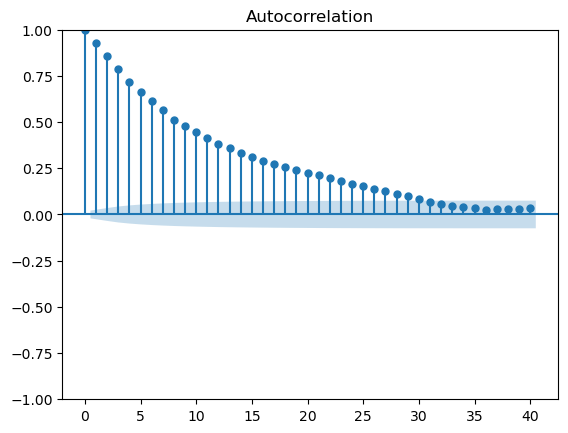

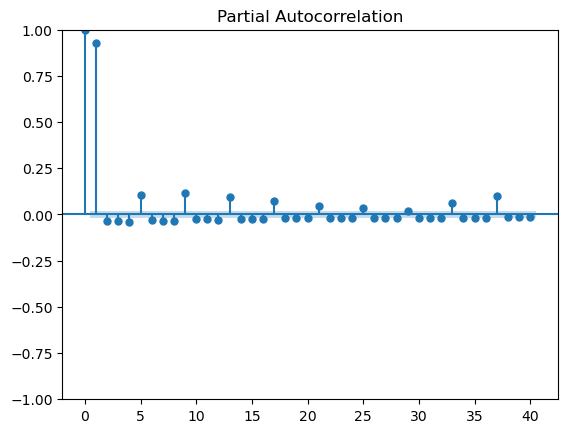

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(data['PM2.5 (µg/m3)'])

pacf_original = plot_pacf(data['PM2.5 (µg/m3)'])

In [37]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['PM2.5 (µg/m3)'])
print(f'p-value: {adf_test[1]}')

p-value: 9.130846528801509e-21


# ARIMA model

In [56]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(data['PM2.5 (µg/m3)'], order=(2,1,0))
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:          PM2.5 (µg/m3)   No. Observations:                 8640
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -42081.043
Date:                Mon, 17 Jul 2023   AIC                          84168.086
Time:                        03:15:34   BIC                          84189.278
Sample:                             0   HQIC                         84175.312
                               - 8640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0282      0.002   -417.107      0.000      -1.033      -1.023
ar.L2         -0.5418      0.004   -137.722      0.000      -0.549      -0.534
sigma2       997.0076      4.655    214.201      0.0

# Time Series Prediction

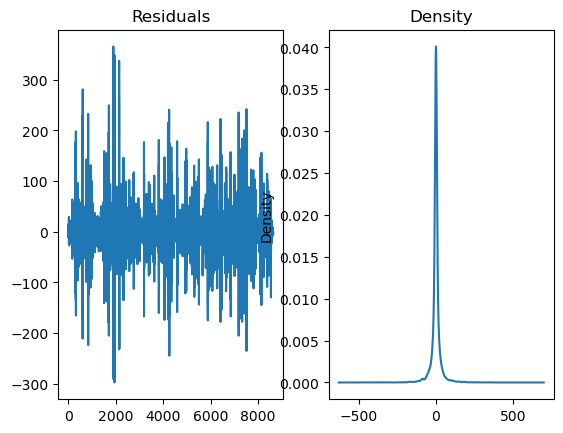

In [57]:
import matplotlib.pyplot as plt
residuals = model_fit1.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [58]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(data['PM10 (µg/m3)'], order=(2,1,0))
model_fit2 = model2.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:           PM10 (µg/m3)   No. Observations:                 8640
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1784.428
Date:                Mon, 17 Jul 2023   AIC                          -3562.855
Time:                        03:16:20   BIC                          -3541.663
Sample:                             0   HQIC                         -3555.629
                               - 8640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0295      0.012     -2.401      0.016      -0.054      -0.005
ar.L2         -0.0023      0.070     -0.033      0.974      -0.140       0.136
sigma2         0.0387      0.000    253.486      0.0

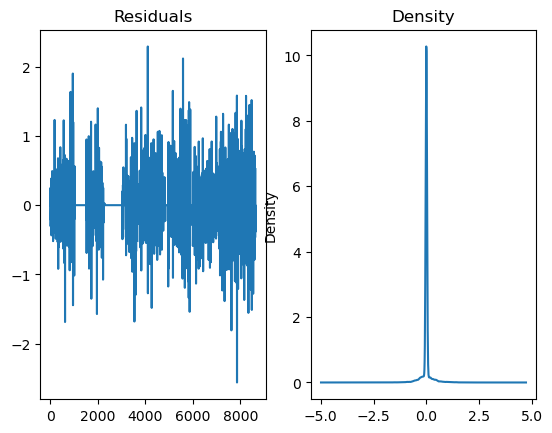

In [59]:
import matplotlib.pyplot as plt
residuals = model_fit2.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [60]:
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(data['NO (µg/m3)'], order=(2,1,0))
model_fit3 = model3.fit()
print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:             NO (µg/m3)   No. Observations:                 8640
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -23360.897
Date:                Mon, 17 Jul 2023   AIC                          46727.794
Time:                        03:17:35   BIC                          46748.986
Sample:                             0   HQIC                         46735.020
                               - 8640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5434      0.002    258.719      0.000       0.539       0.548
ar.L2         -0.1004      0.002    -40.336      0.000      -0.105      -0.096
sigma2        13.0711      0.038    343.883      0.0

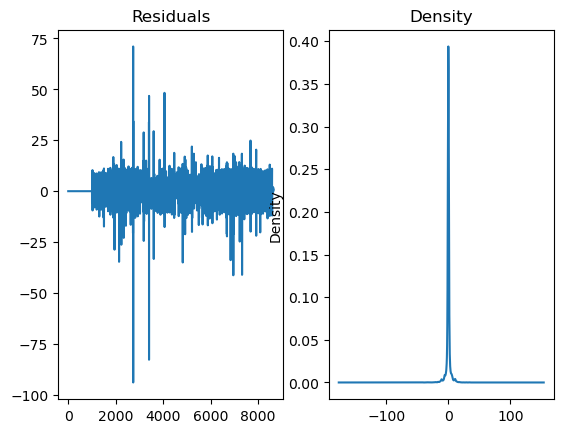

In [61]:
import matplotlib.pyplot as plt
residuals = model_fit3.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()